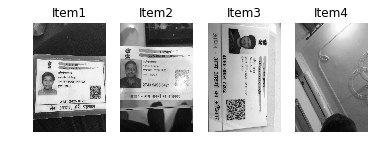

In [1]:
%matplotlib inline

# import the necessary packages
from skimage.measure import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

# import the necessary packages
from skimage.measure import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

def compare_images(imageA, imageB, title):
    # compute the mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)
#     m = 10
    s = ssim(imageA, imageB)

    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")

    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")

    # show the images
    plt.show()

item1, item2 = cv2.imread("/opt/courses/deeplearning1/nbs/data/AC_front_2/84EEBEA2-1728-4EAE-83E5-CAF3A905A199-6561-0000067B73CBB5BA.jpeg"), cv2.imread("/opt/courses/deeplearning1/nbs/data/AC_front_2/86AC0259-D250-4979-B721-C20D3E78CC21-4348-00000713AC4208D2.jpeg")
item3, item4 = cv2.imread("/opt/courses/deeplearning1/nbs/data/AC_front_2/734CCB35-9BA6-4900-A766-984FE5CE846C-831-0000007E18BEAEA6.jpeg"), cv2.imread("/opt/courses/deeplearning1/nbs/data/AC_front_2/83FF5089-C8F5-44A9-B2AF-D73015D541B3-362-0000005C4A8AE5F4.jpeg")
item1, item2, item3, item4 = cv2.cvtColor(item1, cv2.COLOR_BGR2GRAY), cv2.cvtColor(item2, cv2.COLOR_BGR2GRAY),cv2.cvtColor(item3, cv2.COLOR_BGR2GRAY), cv2.cvtColor(item4, cv2.COLOR_BGR2GRAY)

item1, item2, item3, item4 = cv2.resize(item1, (400, 600)) ,cv2.resize(item2, (400, 600)) ,cv2.resize(item3, (400, 600)) ,cv2.resize(item4, (400, 600)) 

fig = plt.figure("Images")

images = ("Item1", item1), ("Item2", item2),("Item3", item3), ("Item4", item4)
# loop over the images
for (i, (name, image)) in enumerate(images):
    # show the image
    ax = fig.add_subplot(1, 4, i + 1)
    ax.set_title(name)
    plt.imshow(image, cmap = plt.cm.gray)
    plt.axis("off")
plt.show()

/usr/local/lib/python2.7/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


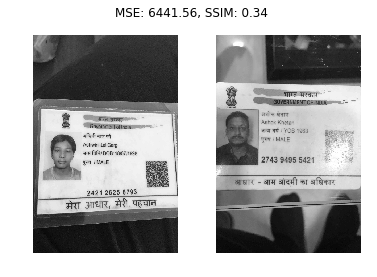

In [3]:
compare_images(item1, item2, "1vs2")

/usr/local/lib/python2.7/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


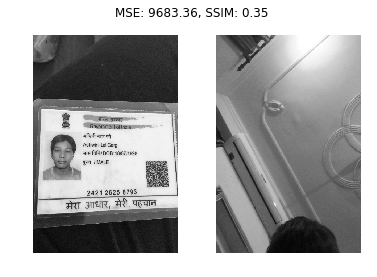

In [4]:
compare_images(item1, item4, "1vs4")

In [5]:
# sift = cv2.xfeatures2d.SIFT_create()
# kp = sift.detect(item1,None)


In [ ]:
detector = cv2.FeatureDetector_create("SURF")
descriptor = cv2.DescriptorExtractor_create("SURF")
 
skp = detector.detect(item1)
# skp, sd = descriptor.compute(item1, skp)

In [1]:
import numpy as np
import cv2
img = cv2.imread("/opt/courses/deeplearning1/nbs/data/AC_front_2/84EEBEA2-1728-4EAE-83E5-CAF3A905A199-6561-0000067B73CBB5BA.jpeg")


gray = cv2.imread("/opt/courses/deeplearning1/nbs/data/AC_front_2/84EEBEA2-1728-4EAE-83E5-CAF3A905A199-6561-0000067B73CBB5BA.jpeg",0)

ret,thresh = cv2.threshold(gray,127,255,1)

contours,h = cv2.findContours(thresh,1,2)


In [ ]:
for cnt in contours:
    approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
    print len(approx)
    if len(approx)==5:
        print "pentagon"
        cv2.drawContours(img,[cnt],0,255,-1)
    elif len(approx)==3:
        print "triangle"
        cv2.drawContours(img,[cnt],0,(0,255,0),-1)
    elif len(approx)==4:
        print "square"
        cv2.drawContours(img,[cnt],0,(0,0,255),-1)
    elif len(approx) == 9:
        print "half-circle"
        cv2.drawContours(img,[cnt],0,(255,255,0),-1)
    elif len(approx) > 15:
        print "circle"
        cv2.drawContours(img,[cnt],0,(0,255,255),-1)

cv2.imshow('img',img)

6
7
6
6
6
6
6
4
square
4
square
14
6
13
8
12
16
circle
12
6
6
16
circle
6
6
4
square
9
half-circle
4
square
6
6
4
square
4
square
6
4
square
6
8
6
4
square
6
6
6
8
4
square
10
6
6
7
6
6
9
half-circle
4
square
6
4
square
10
6
7
14
6
18
circle
6
9
half-circle
11
6
4
square
8
11
6
6
6
7
6
5
pentagon
6
6
6
8
4
square
9
half-circle
11
9
half-circle
9
half-circle
8
4
square
6
8
17
circle
9
half-circle
4
square
6
6
1
2
4
square
1
3
triangle
9
half-circle
8
9
half-circle
6
9
half-circle
9
half-circle
6
15
14
8
4
square
6
6
7
11
7
4
square
6
8
9
half-circle
9
half-circle
4
square
6
12
10
6
11
6
9
half-circle
6
7
10
8
9
half-circle
6
4
square
8
12
8
6
9
half-circle
14
13
8
9
half-circle
9
half-circle
4
square
9
half-circle
7
12
6
10
11
10
8
8
12
9
half-circle
10
12
11
8
7
9
half-circle
11
10
17
circle
14
11
10
7
8
12
7
9
half-circle
11
8
12
13
15
10
12
4
square
15
11
14
12
15
17
circle
8
8
11
15
10
11
16
circle
18
circle
12
8
15
12
16
circle
19
circle
14
20
circle
6
8
17
circle
13
10
11
6
7
14
1